# Recognising Handwritten Digits on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist/mnist_test.csv')

In [3]:
print(df.shape)

(10000, 785)


In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values

In [6]:
print(data.shape)

(10000, 785)


In [7]:
print(type(data))

<class 'numpy.ndarray'>


In [8]:
# x is all the rows except after first column
x = data[:,1:]
# y is all the rows only 0th column
y = data[:,0]

In [9]:
print(x.shape,y.shape)

(10000, 784) (10000,)


In [10]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
print(y)

[7 2 1 ... 4 5 6]


## Train -Test split

In [12]:
split = int(0.8 * x.shape[0])

In [13]:
split

8000

In [14]:
x_train = x[:split,:] # all the rows till split and all the columns
y_train = y[:split] # all the rows till split

In [15]:
x_test = x[split:, :] # all rows and columns after split
y_test = y[split:] # all rows after split

In [16]:
print(x_train.shape,y_train.shape)

(8000, 784) (8000,)


In [17]:
print(x_test.shape,y_test.shape)

(2000, 784) (2000,)


## visualise some samples
### imshow() draw an image using matplotlib

In [18]:
def drawImage(sample):
    #reshape that image
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

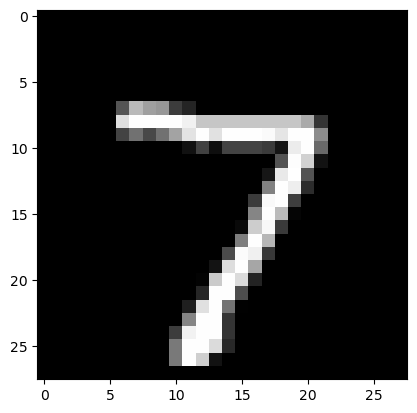

7


In [19]:
drawImage(x_train[0])
print(y_train[0])

In [20]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
    
def knn(x,y,querypoint,k=7):
    #pick k nearest vaalues

    vals = []
    
    #for every point in x 
    for i in range(x.shape[0]):
        #computing distance
        d = distance(querypoint,x[i])
        vals.append((d,y[i])) #appending class and distance

    #print(vals)
    
    #2.sort the array and find k nearest points
    vals = sorted(vals)
    vals = vals[:k] #first k points

    #Majority Vote
    vals = np.array(vals)
    #passing y value
    new_values = np.unique(vals[:,1],return_counts=True)
    print(new_values)
    # #index of the maximum count
    index = new_values[1].argmax()
    # #map this index with my data
    pred = new_values[0][index]
    return pred

In [21]:
#make predictions over test images
pred = knn(x_train,y_train,x_test[1999])

(array([6.]), array([7], dtype=int64))


In [22]:
pred

6.0

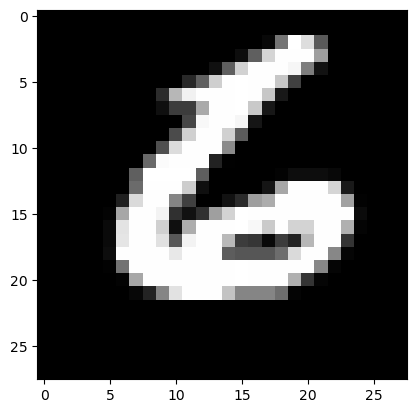

In [23]:
drawImage(x_test[1999])

In [24]:
print(y_test[1999])

6


### Acurracy of the Model

In [25]:
def compute_accuracy(x_test,y_test):
    prediction = []
    for i in range(x_test.shape[0]):
        prediction.append(knn(x_train,y_train,x_test[i]))

    prediction = np.array(prediction)
    return float((prediction == y_test).sum())/y_test.shape[0]

In [26]:
print(compute_accuracy(x_test,y_test))

(array([2., 4.]), array([1, 6], dtype=int64))
(array([9.]), array([7], dtype=int64))
(array([9.]), array([7], dtype=int64))
(array([7.]), array([7], dtype=int64))
(array([1.]), array([7], dtype=int64))
(array([1.]), array([7], dtype=int64))
(array([7., 9.]), array([1, 6], dtype=int64))
(array([0.]), array([7], dtype=int64))
(array([7.]), array([7], dtype=int64))
(array([8.]), array([7], dtype=int64))
(array([3.]), array([7], dtype=int64))
(array([4.]), array([7], dtype=int64))
(array([7., 8.]), array([2, 5], dtype=int64))
(array([6.]), array([7], dtype=int64))
(array([3.]), array([7], dtype=int64))
(array([8.]), array([7], dtype=int64))
(array([0.]), array([7], dtype=int64))
(array([9.]), array([7], dtype=int64))
(array([6.]), array([7], dtype=int64))
(array([2., 7.]), array([6, 1], dtype=int64))
(array([1.]), array([7], dtype=int64))
(array([0.]), array([7], dtype=int64))
(array([1.]), array([7], dtype=int64))
(array([0.]), array([7], dtype=int64))
(array([6.]), array([7], dtype=int64